In [1]:
# libraries
import pandas as pd 
import numpy as np 
import os 
import pickle as pkl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
from matplotlib import colors as clrs
import matplotlib.lines as lines
from matplotlib.ticker import FormatStrFormatter

import warnings
warnings.filterwarnings("ignore")

# libraries
import sys
sys.path.append("../../models")
from functions import import_country

plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['ytick.major.width'] = 0.3
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.width'] = 0.2
plt.rcParams['ytick.minor.width'] = 0.2
plt.rcParams['xtick.minor.size'] = 1.5
plt.rcParams['ytick.minor.size'] = 1.5

font_dirs = ['../fonts/Bai_Jamjuree/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Bai Jamjuree'
plt.rcParams['font.sans-serif'] = 'Bai Jamjuree'

colors = ['#6CC2BD', '#5A809E', '#7C79A2', '#F57D7C', '#FFC1A6', '#FEE4C4']
countries = ["Egypt", "Peru", "Ukraine", "Serbia", "Italy", "Canada"]
props = dict(facecolor='grey', alpha=0.1, linewidth=0.3)

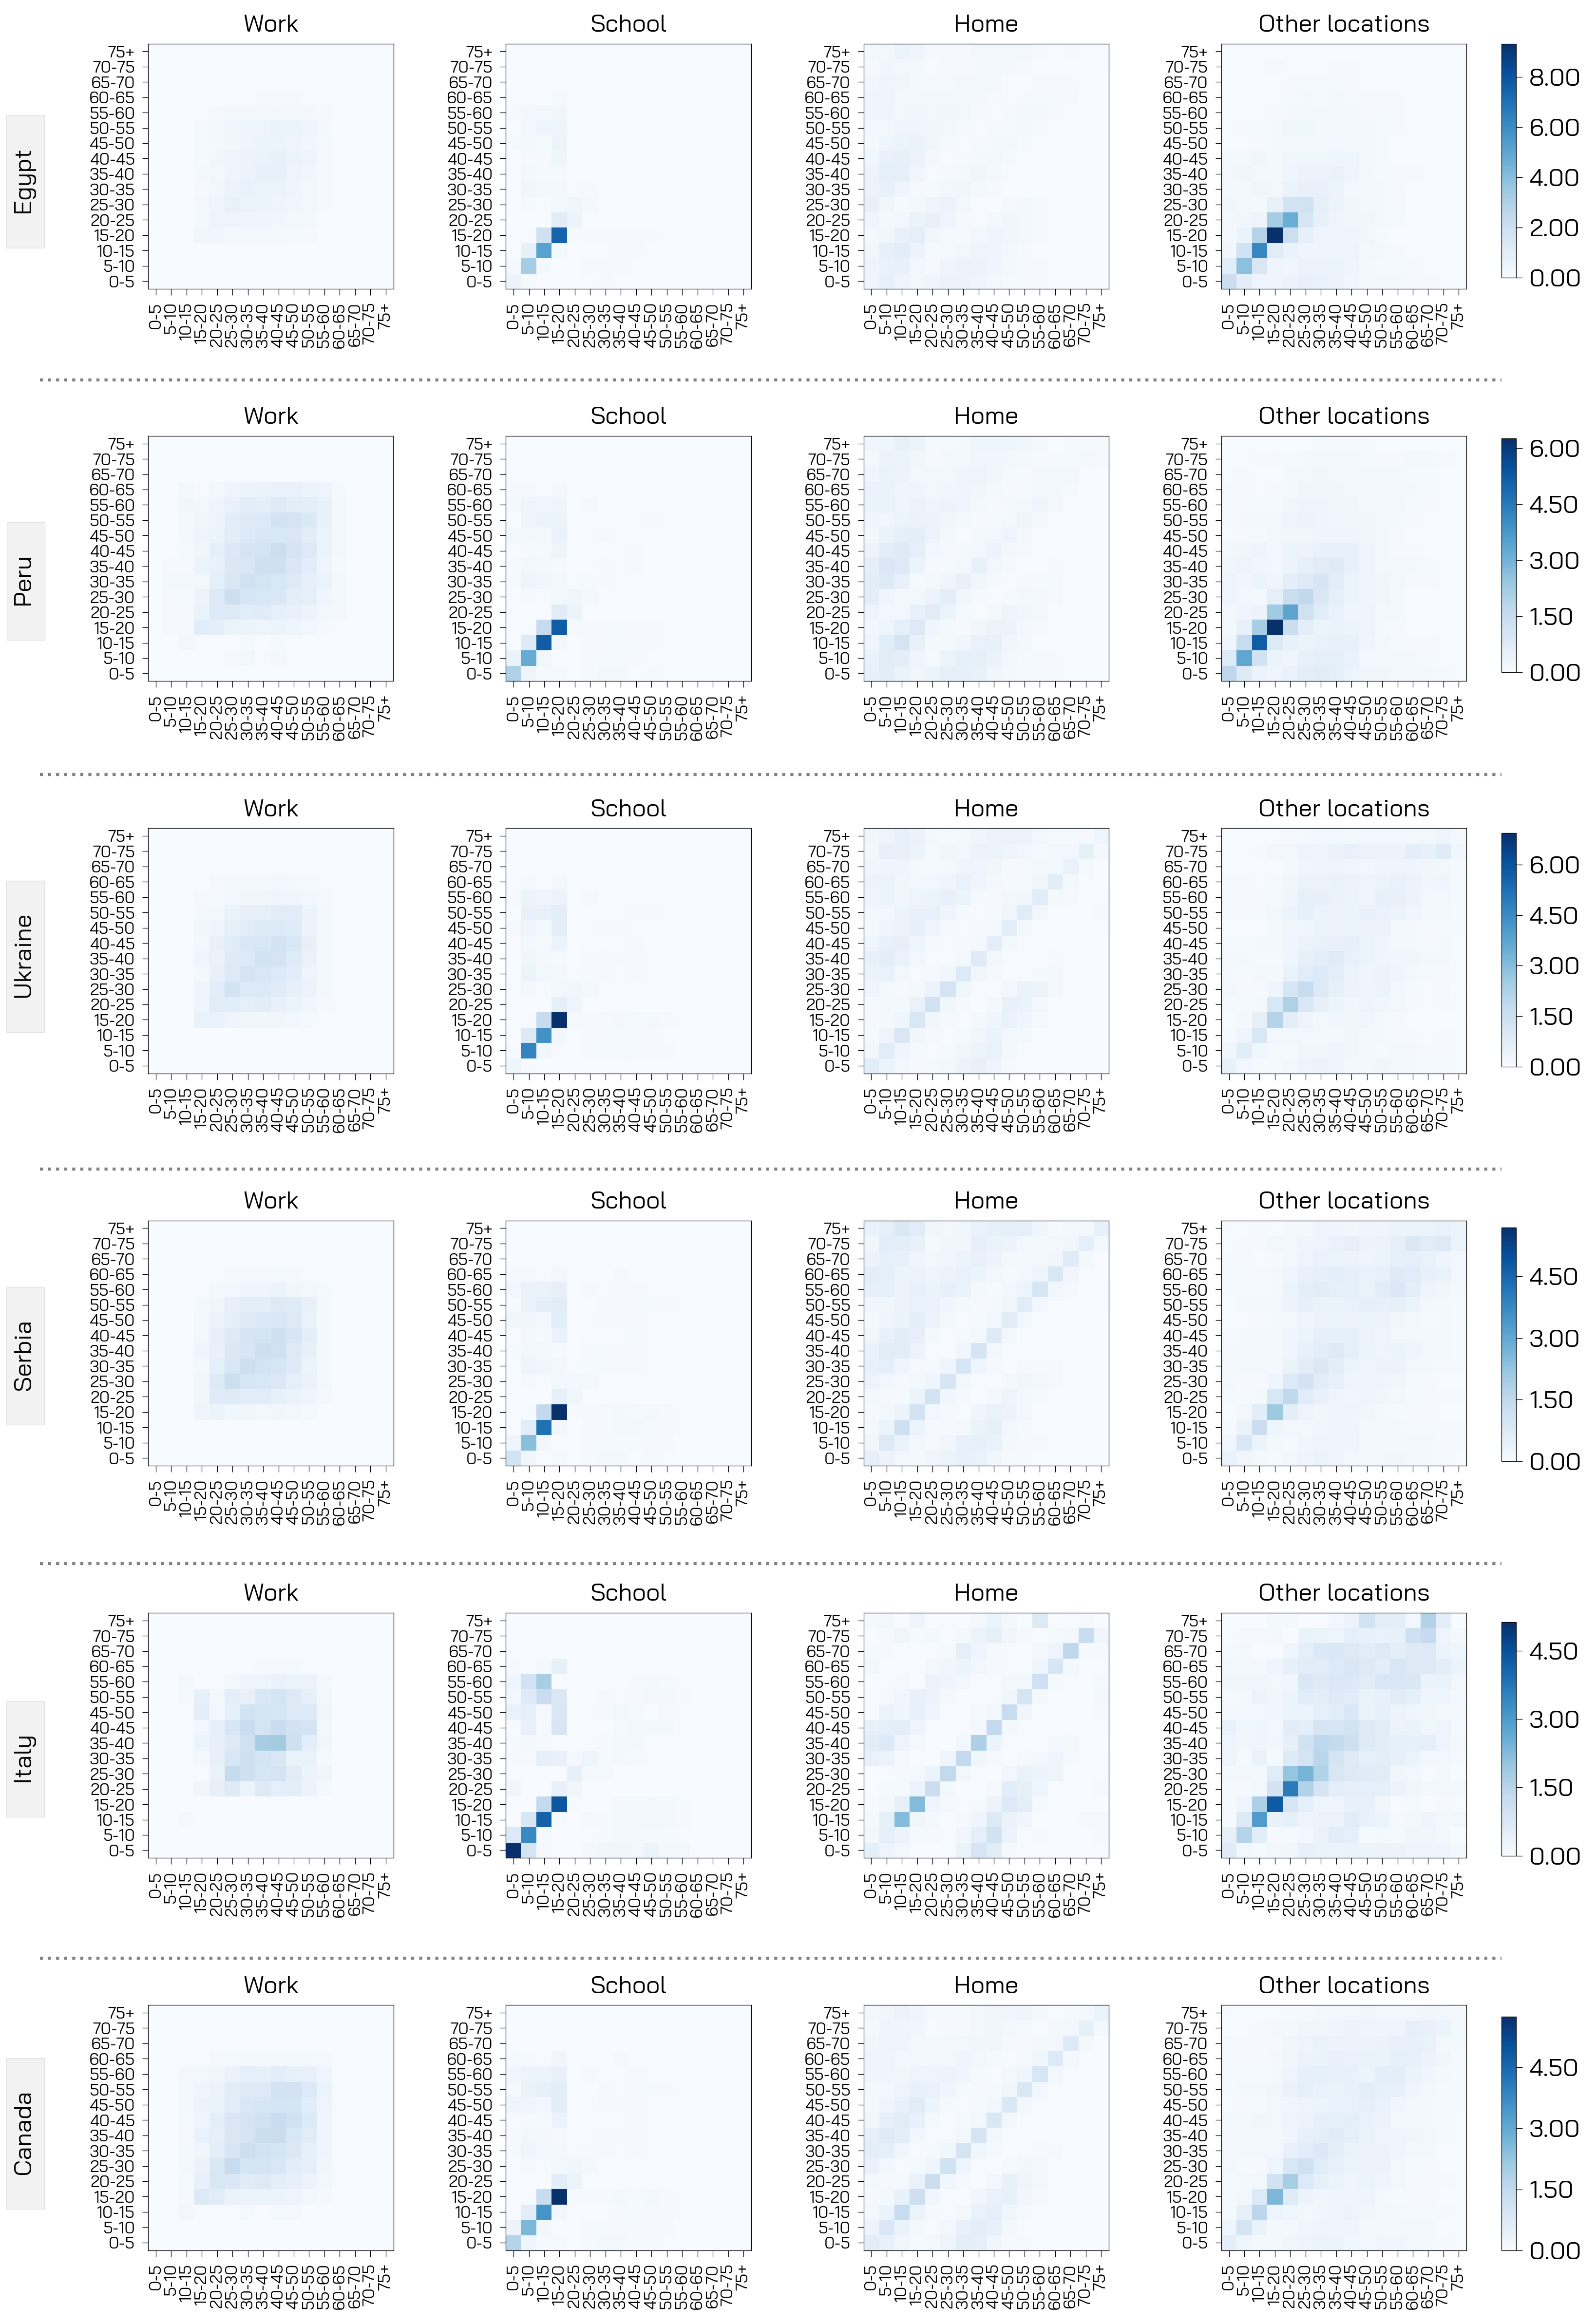

In [2]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20), dpi=300)

i = 0
ims = {}
for c in countries:
    country = import_country(c, "../../../data/countries/")
    
    min_ = 100
    max_ = 0
    for contacts in ['work', 'school', 'home', 'other_locations']:
        if country["contacts_" + contacts].min() < min_:
            min_ = country["contacts_" + contacts].min()
        if country["contacts_" + contacts].max() > max_:
            max_ = country["contacts_" + contacts].max()

    j = 0
    axes[i, 0].annotate("    " + c + "    ", xy=(-0.5,0.2), xycoords='axes fraction', bbox=props, rotation=90, fontsize=12, va='bottom', ha='center')
    for contacts in ['work', 'school', 'home', 'other_locations']:
        ims[c] = axes[i, j].imshow(country["contacts_" + contacts], origin="lower", vmin=min_, vmax=max_, cmap="Blues")
        axes[i, j].set_xticks(range(16))
        axes[i, j].set_yticks(range(16))
        axes[i, j].set_xticklabels(["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", 
                                 "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75", "75+"], rotation=90, size=8)
        axes[i, j].set_yticklabels(["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", 
                                 "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75", "75+"], size=8);
        axes[i, j].set_title(contacts.capitalize().replace("_", " "))
        
        j += 1

    i += 1
    
cbar_ax = fig.add_axes([0.75, 0.8, 0.005, 0.08])
cbar = plt.colorbar(ims[countries[0]], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(5))

cbar_ax = fig.add_axes([0.75, 0.8 - 1 * 0.135, 0.005, 0.08])
cbar = plt.colorbar(ims[countries[1]], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(5))

cbar_ax = fig.add_axes([0.75, 0.8 - 2 * 0.135, 0.005, 0.08])
cbar = plt.colorbar(ims[countries[2]], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(5))

cbar_ax = fig.add_axes([0.75, 0.8 - 3 * 0.135, 0.005, 0.08])
cbar = plt.colorbar(ims[countries[3]], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(5))

cbar_ax = fig.add_axes([0.75, 0.8 - 4 * 0.135, 0.005, 0.08])
cbar = plt.colorbar(ims[countries[4]], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(5))

cbar_ax = fig.add_axes([0.75, 0.8 - 5 * 0.135, 0.005, 0.08])
cbar = plt.colorbar(ims[countries[5]], cax=cbar_ax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.subplots_adjust(hspace=0.6, wspace=-0.7)
fig.add_artist(lines.Line2D([0.25, 0.75], [0.765, 0.765], linestyle="dotted", color="gray"))
fig.add_artist(lines.Line2D([0.25, 0.75], [0.765 - 0.135, 0.765 - 0.135], linestyle="dotted", color="gray"))
fig.add_artist(lines.Line2D([0.25, 0.75], [0.765 - 2 * 0.135, 0.765 - 2 * 0.135], linestyle="dotted", color="gray"))
fig.add_artist(lines.Line2D([0.25, 0.75], [0.765 - 3 * 0.135, 0.765 - 3 * 0.135], linestyle="dotted", color="gray"))
fig.add_artist(lines.Line2D([0.25, 0.75], [0.765 - 4 * 0.135, 0.765 - 4 * 0.135], linestyle="dotted", color="gray"))

plt.savefig('./SM_img/contacts_matrix.pdf', bbox_inches="tight")

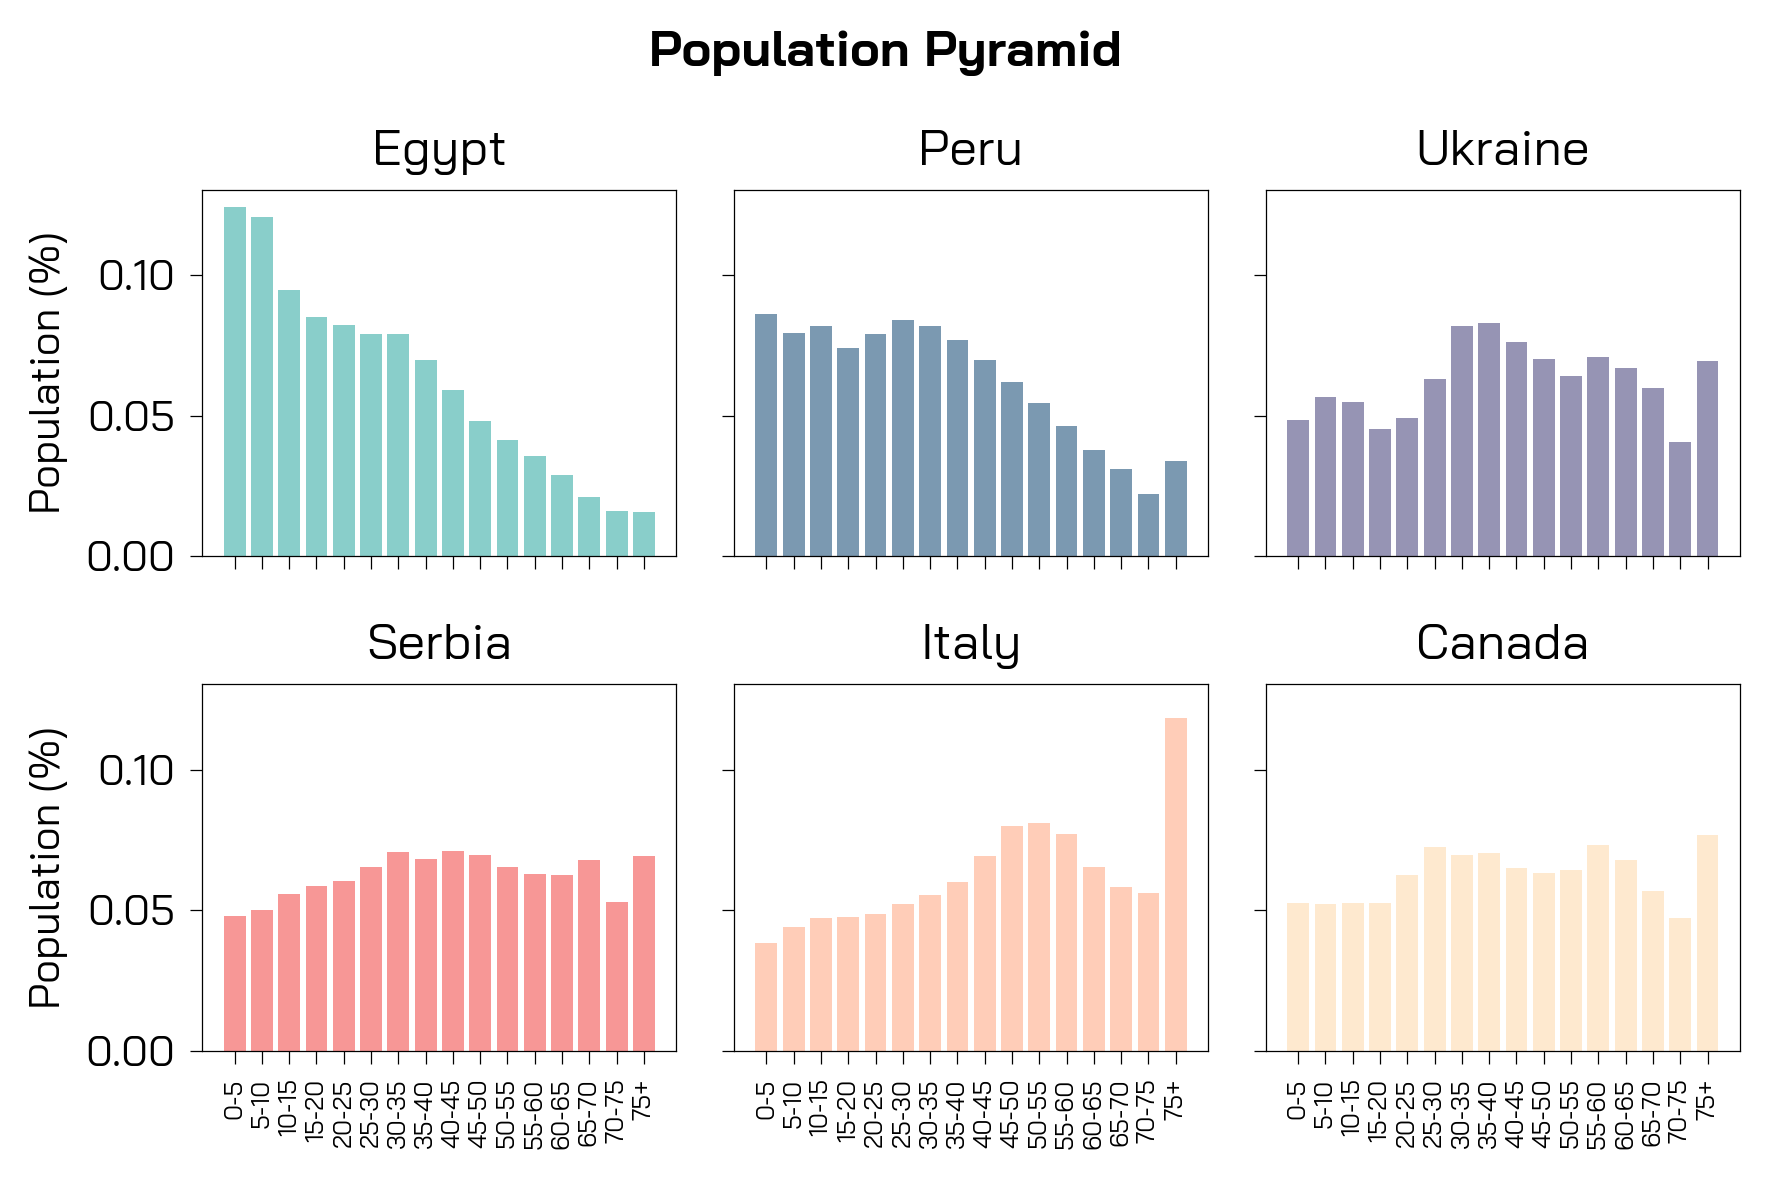

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, dpi=300, sharey=True, sharex=True)

i,j,k = 0,0,0
for c in countries:
    country = import_country(c, "../../../data/countries/")
    axes[i,j].bar(range(16), country["Nk"] / country["Nk"].sum(), color=colors[k], alpha=0.8)
    axes[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    axes[i,j].set_title(c)    
    axes[i, j].set_xticks(range(16))
    axes[i, j].set_xticklabels(["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", 
                                 "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75", "75+"], rotation=90, size=6)
       
    
    k += 1
    j += 1 
    if j == 3:
        j = 0
        i += 1

axes[0,0].set_ylabel("Population (%)")
axes[1,0].set_ylabel("Population (%)")
fig.suptitle("Population Pyramid", weight="bold", y=0.97)
plt.tight_layout()

plt.savefig("./SM_img/pop_pyramid.pdf", bbox_inches="tight")

In [4]:
# libraries
import sys
sys.path.append("../../models/")
from vaccine_behaviour import integrate_BV

# epi params
eps   = 1.0 / 3.7
mu    = 1.0 / 2.5
omega = 1.0 / 1.5
chi   = 0.55
f     = 0.35
IFR   = [0.00161 / 100, # 0-4  
         0.00161 / 100, # 5-9
         0.00695 / 100, # 10-14
         0.00695 / 100, # 15-19 
         0.0309  / 100, # 20-24 
         0.0309  / 100, # 25-29
         0.0844  / 100, # 30-34
         0.0844  / 100, # 35-39
         0.161   / 100, # 40-44 
         0.161   / 100, # 45-49 
         0.595   / 100, # 50-54 
         0.595   / 100, # 55-59 
         1.93    / 100, # 60-64
         1.93    / 100, # 65-69 
         4.28    / 100, # 70-74 
         6.04    / 100] # 75+

start_date = datetime(2021, 1, 1)
end_date   = datetime(2022, 1, 1)

VES = 0.7
VEM = 0.6

R0      = 2
Delta   = 17
i0      = 0.5 / 100.0
r0      = 10.0 / 100.0

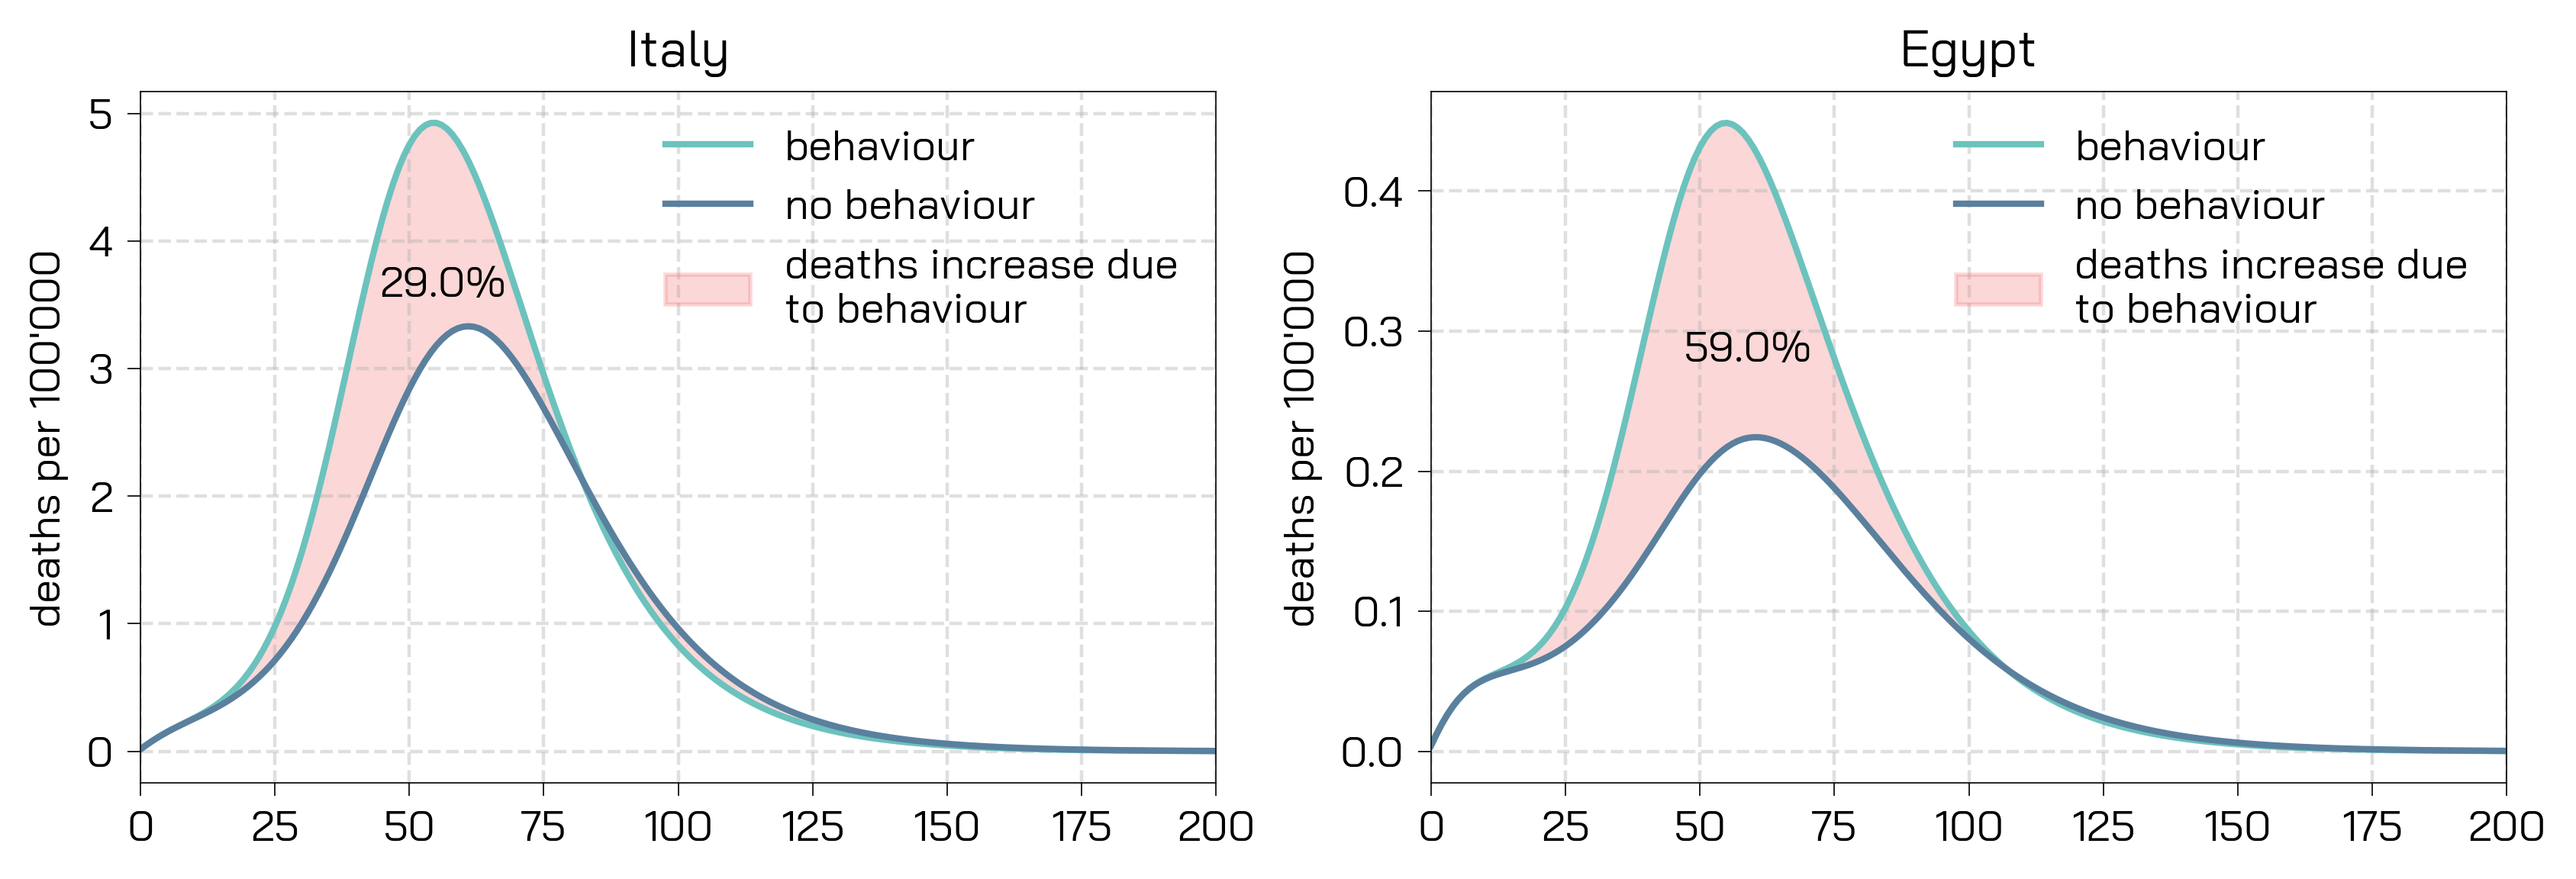

In [6]:
fig, axes = plt.subplots(ncols=2, dpi=400, sharey=False, figsize=(10,3))

g = 0
for country in ["Italy", "Egypt"]:
    
    country_dict = import_country(country, "../../../data/countries/")
    C = country_dict["contacts_home"] + country_dict["contacts_work"] + \
        country_dict["contacts_school"] + country_dict["contacts_other_locations"]
    Nk = 10**6 * country_dict["Nk"] / country_dict["Nk"].sum()
    
    Cs = {}
    date, dates = start_date, [start_date]
    for i in range((end_date - start_date).days): 
        Cs[date] = C
        date += timedelta(days=1)
        dates.append(date)

    # initial conditions
    ics = np.zeros((16, 20))
    for k in range(16):
        ics[k, 4] = eps**(-1) / (mu**(-1) + omega**(-1) + eps**(-1)) * i0 * Nk[k]
        ics[k, 5] = omega**(-1) / (mu**(-1) + omega**(-1) + eps**(-1)) * i0 * Nk[k]
        ics[k, 6] = f * mu**(-1) / (mu**(-1) + omega**(-1) + eps**(-1)) * i0 * Nk[k]
        ics[k, 7] = (1 - f) * mu**(-1) / (mu**(-1) + omega**(-1) + eps**(-1)) * i0 * Nk[k]
        ics[k, 9] = r0 * Nk[k]
        ics[k, 0] = Nk[k] - ics[k, 4] - ics[k, 5] - ics[k, 6] - ics[k, 7] - ics[k, 9]
        
        
    sol_b, Vt, vs = integrate_BV(ics, (end_date - start_date).days, R0=R0, eps=eps, mu=mu, omega=omega, 
                                 chi=chi, f=f, IFR=IFR, Delta=Delta, r=1., alpha=0., gamma=0., 
                                 rV=0.25/ 100, VES=VES,VEM=VEM, Cs=Cs, Nk=Nk, 
                                 vaccination_strategy="old_first", model="vaccine_rate", dates=dates)
    
    
    sol, Vt, vs = integrate_BV(ics, (end_date - start_date).days, R0=R0, eps=eps, mu=mu, omega=omega, 
                           chi=chi, f=f, IFR=IFR, Delta=Delta, r=1.3, alpha=10.0, gamma=0.5, 
                           rV=0.25/ 100, VES=VES,VEM=VEM, Cs=Cs, Nk=Nk, 
                           vaccination_strategy="old_first", model="vaccine_rate", dates=dates)

    sol_b = sol_b.sum(axis=0)
    DO_b = 100000 * np.diff(sol_b[11, :] + sol_b[19, :]) /  np.sum(Nk) 
    sol = sol.sum(axis=0)
    DO = 100000 * np.diff(sol[11, :] + sol[19, :]) /  np.sum(Nk) 
    
    do_b = (sol_b[11, :] + sol_b[19, :])[-1]
    do = (sol[11, :] + sol[19, :])[-1]
    
    axes[g].plot(DO, color=colors[0], label="behaviour")
    axes[g].plot(DO_b, color=colors[1], label="no behaviour")
    axes[g].fill_between(range(len(DO)), DO, DO_b, alpha=0.3, color=colors[3], label="deaths increase due\nto behaviour")

    
    text = str(np.round(100 * (do - do_b) / do_b, 0)) + "%"

    if country == "Italy":
        
        axes[g].annotate(text, xy=(50, 4),  xycoords='data', xytext=(44.5, 3.8), textcoords='data',
                        horizontalalignment='left', verticalalignment='top')
    else:
        
        axes[g].annotate(text, xy=(50, 0.4),  xycoords='data', xytext=(47, 0.3), textcoords='data',
                        horizontalalignment='left', verticalalignment='top')
        
    axes[g].set_ylabel("deaths per 100'000")
    axes[g].set_xlim(xmin=0, xmax=200)
    axes[g].legend(loc="upper right", frameon=False, ncol=1)
    
    axes[g].grid(linestyle='--', alpha=0.4)
    
    g += 1
    


axes[0].set_title("Italy")
axes[1].set_title("Egypt")

plt.savefig("./SM_img/ita_egy_comparison.pdf", bbox_inches="tight")